In [ ]:
pip install ipykernel

In [2]:
pip install --upgrade pip

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 2.1 MB 68.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mindspore

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 MB 12.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install easydict

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
  Preparing metadata (setup.py) ... done
  Created wheel for easydict: filename=easydict-1.10-py3-none-any.whl size=6490 sha256=b1f81c5d8277fddab81c71e25f14cde6a01a64973e45430427c89820646f38e1
  Stored in directory: /home/ma-user/.cache/pip/wheels/8c/05/6d/fddd4fafb9fd967e769b2b75b821fd05188437613c4eb30ca1
Successfully built easydict
Note: you may need to restart the kernel to use updated packages.


目标结果 (x_1, x_2) = (3, 0.5)


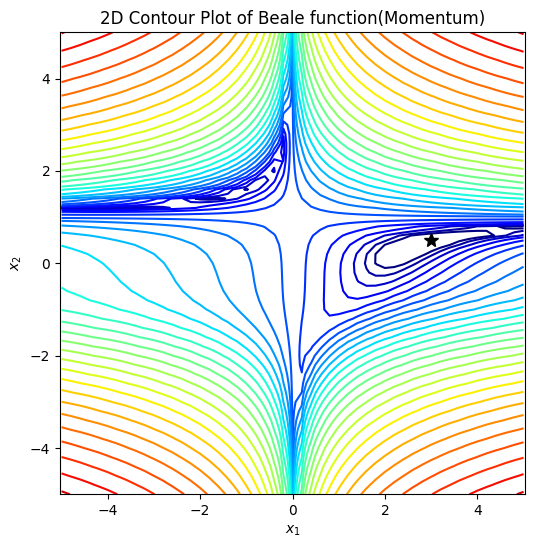

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl # Matplotlib的色阶条
# ------------------定义目标函数beale、目标函数的偏导函数dbeale_dx，并画出目标函数---------------------
#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2

#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1) # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2) # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2

# 定义画图函数
def gd_plot(x_traj):
    plt.rcParams['figure.figsize'] = [6, 6] # 窗口大小
    plt.contour(X1, X2, Y, levels=np.logspace(0, 6, 30),norm=plt_cl.LogNorm(), cmap=plt.cm.jet) # 画等高线图
    plt.title('2D Contour Plot of Beale function(Momentum)') # 添加标题
    plt.xlabel('$x_1$') # x轴标签
    plt.ylabel('$x_2$') # y轴标签
    plt.axis('equal') # 设置坐标轴为正方形
    plt.plot(3, 0.5, 'k*', markersize=10) # 画出最低点
    if x_traj is not None:
        x_traj = np.array(x_traj) # 将x_traj转为数组
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')
    # 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
plt.show() # 显示图像
    
step_x1, step_x2 = 0.2, 0.2
X1, X2 = np.meshgrid(np.arange(-5, 5 + step_x1, step_x1),np.arange(-5, 5 + step_x2, step_x2)) # 将图形从-5 到 5.2，步长为0.2 划分成网格点
Y = beale(X1, X2) # 将x1,x2坐标带入beale公式
print("目标结果 (x_1, x_2) = (3, 0.5)")
gd_plot(None) # 调用函数

无优化器求得的极值点 (x_1, x_2) = (1.0, 1.5)


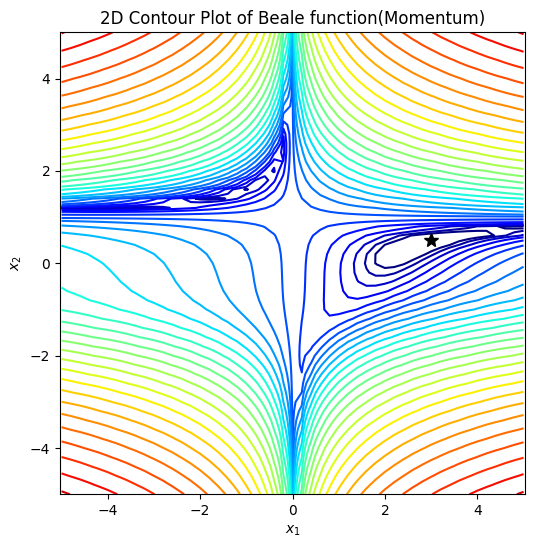

In [12]:
#无优化器
default_iteration = 1000 #默认的迭代次数
default_learning_rate = 0.001 #默认的学习率

#df_dx是目标函数 f(x)的“梯度函数！！！”
def no_optimizer(df_dx, x0, n_iter=default_iteration, learning_rate=default_learning_rate):
    x_traj = [x0]
    v = np.zeros_like(x0)
    for iter in range(1, n_iter + 1):
        x_traj.append(x_traj[-1])
    #返回列表x_traj,每个元素表示每次迭代后得到的点的坐标
    return x_traj

#x0 是初始点
x0 = np.array([1.0, 1.5])
#x_traj_no存储了通过无优化器的梯度下降算法求得的最终极小值点
#x trajectory for no optimizer 无优化器的 x 轨迹
x_traj_no = no_optimizer(dbeale_dx, x0, 2000, 50)
print("无优化器求得的极值点 (x_1, x_2) = (%s, %s)" % (x_traj_no[-1][0], x_traj_no[-1][1]))
gd_plot(x_traj_no)

SGD求得极值点 (x_1, x_2) = (2.999999999999965, 0.4999999999999913)


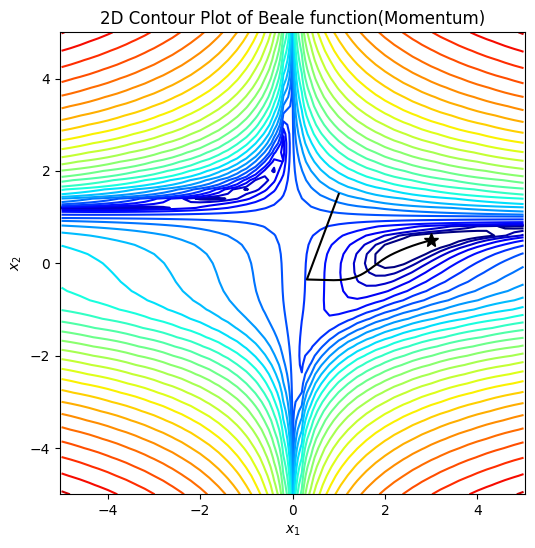

In [13]:
#SGD优化器模型
default_iteration = 1000 #默认的迭代次数
default_learning_rate = 0.001 #默认的学习率

def sgd(df_dx, x0,n_iter=default_iteration, learning_rate=default_learning_rate):
    x_traj = [x0]
    v = np.zeros_like(x0)
    for iter in range(1, n_iter+1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        v = - learning_rate * dfdx
        x_traj.append(x_traj[-1] + v)
    return x_traj

x0 = np.array([1.0, 1.5])
x_traj_sgd =sgd(dbeale_dx, x0, n_iter=20000, learning_rate=0.02,)
print("SGD求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_sgd[-1][0], x_traj_sgd[-1][1]))
gd_plot(x_traj_sgd)

Momentum求得极值点 (x_1, x_2) = (3.0000000000183427, 0.5000000000161976)


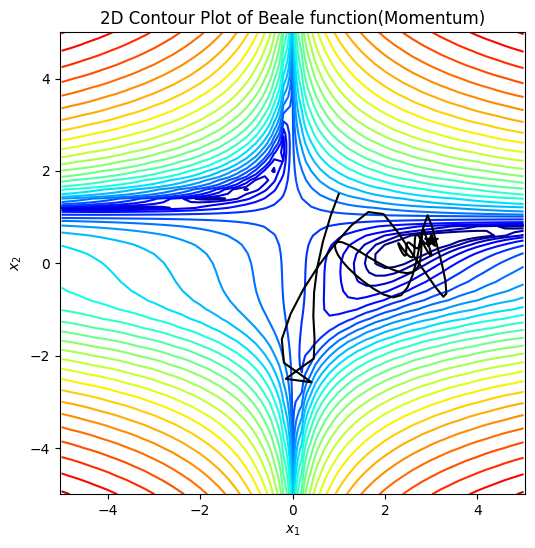

In [15]:
#Momemtum
default_iteration = 1000 #默认的迭代次数
default_learning_rate = 0.001 #默认的学习率
default_momentum = 0.9 # 设置动量参数

def momentum(df_dx, x0, n_iter=default_iteration, learning_rate=default_learning_rate,momen=default_momentum):
    x_traj = [x0]
    v = np.zeros_like(x0)
    for iter in range(1, n_iter + 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        v = momen * v - learning_rate * dfdx
        x_traj.append(x_traj[-1] + v)
    return x_traj

x0 = np.array([1.0, 1.5])
x_traj_momentum = momentum(dbeale_dx, x0, n_iter=1000, learning_rate=0.005, momen=0.95)
print("Momentum求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_momentum[-1][0], x_traj_momentum[-1][1]))
gd_plot(x_traj_momentum)

Adam求得极值点 (x_1, x_2) = (2.99999953329316, 0.4999998828453327)


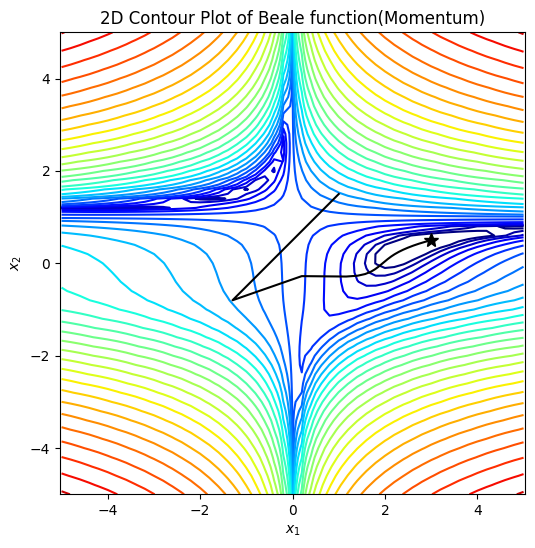

In [16]:
#Adam
default_iteration = 1000 #默认的迭代次数
default_learning_rate = 0.001 #默认的学习率
default_epsilon = 1e-7 

def adam(df_dx, x0, n_iter=default_iteration, learning_rate=default_learning_rate,epsilon=default_epsilon):
    x_traj = [x0]
    r = np.zeros_like(x0)
    for iter in range(1, n_iter+ 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        r += dfdx ** 2
        x_traj.append(x_traj[-1] - learning_rate / (np.sqrt(r) + epsilon) * dfdx)
    return x_traj

x0 = np.array([1.0, 1.5])
x_traj_adam = adam(dbeale_dx, x0, n_iter=1000, learning_rate=2.3)
print("Adam求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_adam[-1][0], x_traj_adam[-1][1]))
gd_plot(x_traj_adam)

In [17]:
import csv
import os
import time
import numpy as np
from easydict import EasyDict as edict
from matplotlib import pyplot as plt

import mindspore
from mindspore import nn
from mindspore import context
from mindspore import dataset
from mindspore.train.callback import TimeMonitor, LossMonitor
from mindspore import Tensor
from mindspore.train import Model
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig
from mindspore import dtype as mstype

context.set_context(mode=context.GRAPH_MODE, device_target="CPU") # 设定运行模式为静态图模式，并且运行设备为昇腾芯片

#变量定义
cfg = edict({
    'data_size': 150,
    'train_size': 120, #训练集大小
    'test_size': 30 , #测试集大小
    'feature_number': 4, #输入特征数
    'num_class': 3, #分类类别
    'batch_size': 30, #批次大小
    'data_dir': 'iris.data', # 数据集路径
    'save_checkpoint_steps': 5, #多少步保存一次模型
    'keep_checkpoint_max': 1, #最多保存多少个模型
    'out_dir_no_opt': './model_iris/no_opt', #保存模型路径，无优化器模型
    'out_dir_sgd': './model_iris/sgd', #保存模型路径,SGD优化器模型
    'out_dir_momentum': './model_iris/momentum', #保存模型路径，momentum模型
    'out_dir_adam': './model_iris/adam', #保存模型路径，adam优化器模型
    'output_prefix': "checkpoint_fashion_forward" #保存模型文件名
})

#鸢尾花数据集，本数据集共有150个带标签的数据
with open(cfg.data_dir) as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
label_map = {'setosa': 0,'versicolor': 1,'virginica':2 }
#分别获取数据中的特征值X和标签值Y
X = np.array([[float(x) for x in s[:-1]] for s in data[:cfg.data_size]],np.float32)
Y = np.array([label_map[s[-1]] for s in data[:cfg.data_size]], np.int32)

# 将数据集分为训练集120条，测试集30条。
train_idx = np.random.choice(cfg.data_size, cfg.train_size, replace=False)
test_idx = np.array(list(set(range(cfg.data_size)) - set(train_idx)))
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]
print('训练数据X_train尺寸：', X_train.shape)
print('测试数据X_test尺寸：', X_test.shape)
print('训练数据Y_train尺寸：', Y_train.shape)
print('测试数据Y_test尺寸：', Y_test.shape)

训练数据X_train尺寸： (120, 4)
测试数据X_test尺寸： (30, 4)
训练数据Y_train尺寸： (120,)
测试数据Y_test尺寸： (30,)


In [18]:
def gen_data(X_train, Y_train, epoch_size):
    XY_train = list(zip(X_train, Y_train))
    ds_train = dataset.GeneratorDataset(XY_train, ['x', 'y'])
    ds_train = ds_train.shuffle(buffer_size=cfg.train_size).batch(cfg.batch_size, drop_remainder=True)
    XY_test = list(zip(X_test, Y_test))
    ds_test = dataset.GeneratorDataset(XY_test, ['x', 'y'])
    ds_test = ds_test.shuffle(buffer_size=cfg.test_size).batch(cfg.test_size, drop_remainder=True)
    return ds_train, ds_test

In [19]:
# 训练
def train(network, net_opt, ds_train, prefix, directory, print_times):
    net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
    model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={"acc"})
    loss_cb = LossMonitor(per_print_times=print_times)
    config_ck = CheckpointConfig(save_checkpoint_steps=cfg.save_checkpoint_steps,
                                 keep_checkpoint_max=cfg.keep_checkpoint_max)
    ckpoint_cb = ModelCheckpoint(prefix=prefix, directory=directory, config=config_ck)
    print("============== Starting Training ==============")
    model.train(epoch_size, ds_train, callbacks=[ckpoint_cb, loss_cb], dataset_sink_mode=False)
    return model

# 评估预测
def predict(model, test_x, label_names):
    predictions = model.predict(test_x).asnumpy()
    indices = np.argmax(predictions, axis=1)
    names = [label_names[i] for i in indices]
    return names

def eval_predict(model, ds_test, label_names):
    metric = model.eval(ds_test)
    print(metric)
    
    test_ = next(ds_test.create_dict_iterator())
    test_x, test_y = Tensor(test_['x'], mstype.float32), Tensor(test_['y'], mstype.int32)
    predicted = predict(model, test_x, label_names)

    for i in range(10):
        print(f"第{i}个sample预测结果: {predicted[i]} , 真实结果: {label_names[test_y.asnumpy()[i]]}")

In [20]:
# 无优化器
epoch_size = 10
print('------------------无 优 化 器-------------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)
# 定义网络并训练
network = nn.Dense(cfg.feature_number, cfg.num_class)
model = train(network, None, ds_train, "checkpoint_no_opt", cfg.out_dir_no_opt, 4)
# 评估预测
label_names=['setosa','versicolor','virginica']
eval_predict(model, ds_test,label_names)

------------------无 优 化 器-------------------
============== Starting Training ==============
epoch: 1 step: 4, loss is 1.1033780574798584
epoch: 2 step: 4, loss is 1.0730925798416138
epoch: 3 step: 4, loss is 1.088187575340271
epoch: 4 step: 4, loss is 1.0903356075286865
epoch: 5 step: 4, loss is 1.1016738414764404
epoch: 6 step: 4, loss is 1.1079634428024292
epoch: 7 step: 4, loss is 1.0990132093429565
epoch: 8 step: 4, loss is 1.0858396291732788
epoch: 9 step: 4, loss is 1.1006163358688354
epoch: 10 step: 4, loss is 1.0937670469284058
{'acc': 0.43333333333333335}
第0个sample预测结果: versicolor , 真实结果: virginica
第1个sample预测结果: versicolor , 真实结果: virginica
第2个sample预测结果: versicolor , 真实结果: versicolor
第3个sample预测结果: versicolor , 真实结果: versicolor
第4个sample预测结果: versicolor , 真实结果: setosa
第5个sample预测结果: versicolor , 真实结果: virginica
第6个sample预测结果: versicolor , 真实结果: setosa
第7个sample预测结果: versicolor , 真实结果: versicolor
第8个sample预测结果: versicolor , 真实结果: setosa
第9个sample预测结果: versicolor , 真实结果: vers

In [21]:
# SGD
epoch_size = 100
learn_rate = 0.01
print('-----------------SGD 优 化 器-------------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)
# 定义网络并训练、测试、预测
network = nn.Dense(cfg.feature_number, cfg.num_class)
net_opt = nn.SGD(network.trainable_params(), learn_rate)
model = train(network, net_opt, ds_train, "checkpoint_sgd", cfg.out_dir_sgd, 40)
# 评估预测
label_names=['setosa','versicolor','virginica']
eval_predict(model, ds_test,label_names)

-----------------SGD 优 化 器-------------------
============== Starting Training ==============
epoch: 10 step: 4, loss is 0.8714983463287354
epoch: 20 step: 4, loss is 0.7618584036827087
epoch: 30 step: 4, loss is 0.6679086685180664
epoch: 40 step: 4, loss is 0.6147910356521606
epoch: 50 step: 4, loss is 0.5703802704811096
epoch: 60 step: 4, loss is 0.5584152340888977
epoch: 70 step: 4, loss is 0.48827409744262695
epoch: 80 step: 4, loss is 0.49799644947052
epoch: 90 step: 4, loss is 0.5849273800849915
epoch: 100 step: 4, loss is 0.4713471531867981
{'acc': 0.8333333333333334}
第0个sample预测结果: virginica , 真实结果: virginica
第1个sample预测结果: virginica , 真实结果: versicolor
第2个sample预测结果: virginica , 真实结果: virginica
第3个sample预测结果: setosa , 真实结果: setosa
第4个sample预测结果: setosa , 真实结果: setosa
第5个sample预测结果: versicolor , 真实结果: versicolor
第6个sample预测结果: virginica , 真实结果: versicolor
第7个sample预测结果: versicolor , 真实结果: versicolor
第8个sample预测结果: setosa , 真实结果: setosa
第9个sample预测结果: virginica , 真实结果: virginica


In [24]:
# Momentum
epoch_size = 20
learn_rate = 0.01
print('---------------Momentum 优 化 器----------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)
# 定义网络并训练
network = nn.Dense(cfg.feature_number, cfg.num_class)
net_opt = nn.Momentum(network.trainable_params(), learn_rate, 0.9)
model = train(network, net_opt, ds_train, "checkpoint_momentum", cfg.out_dir_momentum, 4)
# 评估预测
label_names=['setosa','versicolor','virginica']
eval_predict(model, ds_test,label_names)

---------------Momentum 优 化 器----------------
============== Starting Training ==============
epoch: 1 step: 4, loss is 1.0392662286758423
epoch: 2 step: 4, loss is 0.9489675164222717
epoch: 3 step: 4, loss is 0.8486016988754272
epoch: 4 step: 4, loss is 0.8697572946548462
epoch: 5 step: 4, loss is 0.662886917591095
epoch: 6 step: 4, loss is 0.5406500101089478
epoch: 7 step: 4, loss is 0.523838996887207
epoch: 8 step: 4, loss is 0.5495268106460571
epoch: 9 step: 4, loss is 0.4767979383468628
epoch: 10 step: 4, loss is 0.5587937831878662
epoch: 11 step: 4, loss is 0.3910667598247528
epoch: 12 step: 4, loss is 0.488161563873291
epoch: 13 step: 4, loss is 0.47937268018722534
epoch: 14 step: 4, loss is 0.4017655551433563
epoch: 15 step: 4, loss is 0.43292415142059326
epoch: 16 step: 4, loss is 0.31864097714424133
epoch: 17 step: 4, loss is 0.42372971773147583
epoch: 18 step: 4, loss is 0.37725141644477844
epoch: 19 step: 4, loss is 0.3223778307437897
epoch: 20 step: 4, loss is 0.3368438780

In [25]:
# Adam
epoch_size = 20
learn_rate = 0.05
print('----------------Adam 优 化 器-------------------')
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)
# 定义网络并训练
network = nn.Dense(cfg.feature_number, cfg.num_class)
net_opt = nn.Adam(network.trainable_params(),learn_rate)
model = train(network, net_opt, ds_train, "checkpoint_adam", cfg.out_dir_adam, 4)
# 评估预测
label_names=['setosa','versicolor','virginica']
eval_predict(model, ds_test,label_names)

----------------Adam 优 化 器-------------------
============== Starting Training ==============
epoch: 1 step: 4, loss is 0.938378095626831
epoch: 2 step: 4, loss is 0.8036869764328003
epoch: 3 step: 4, loss is 0.7278391718864441
epoch: 4 step: 4, loss is 0.5451977252960205
epoch: 5 step: 4, loss is 0.4843067526817322
epoch: 6 step: 4, loss is 0.4664253294467926
epoch: 7 step: 4, loss is 0.48034319281578064
epoch: 8 step: 4, loss is 0.31858864426612854
epoch: 9 step: 4, loss is 0.4873591959476471
epoch: 10 step: 4, loss is 0.3511776328086853
epoch: 11 step: 4, loss is 0.41584351658821106
epoch: 12 step: 4, loss is 0.2692805528640747
epoch: 13 step: 4, loss is 0.43314018845558167
epoch: 14 step: 4, loss is 0.38252386450767517
epoch: 15 step: 4, loss is 0.314317524433136
epoch: 16 step: 4, loss is 0.3634137511253357
epoch: 17 step: 4, loss is 0.36192163825035095
epoch: 18 step: 4, loss is 0.22156323492527008
epoch: 19 step: 4, loss is 0.2924705445766449
epoch: 20 step: 4, loss is 0.2945415